In [ ]:
!git clone https://github.com/KamiK4M1/Phishing_Email_Content_with_Personalize_Context_Data_Generation.git

Cloning into 'Phishing_Email_Content_with_Personalize_Context_Data_Generation'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 74 (delta 16), reused 29 (delta 11), pack-reused 39 (from 2)
Receiving objects: 100% (74/74), 64.21 MiB | 23.31 MiB/s, done.
Resolving deltas: 100% (30/30), done.


Processing qwen3_0.6B...
  Mean accuracy: 56.00%
  Mean F1 score: 60.74%
Processing qwen3_0.6B-Add-Dataset...
  Mean accuracy: 50.67%
  Mean F1 score: 56.14%
Processing llama3.2_1b...
  Mean accuracy: 56.67%
  Mean F1 score: 61.21%
Processing llama3.2_1b-Add-Dataset...
  Mean accuracy: 49.33%
  Mean F1 score: 54.95%
Processing llama3_1_8b_rag...
  Mean accuracy: 25.00%
  Mean F1 score: 37.10%
Processing GPT_4_1...
  Mean accuracy: 34.00%
  Mean F1 score: 45.08%
Processing llama3_1_8b...
  Mean accuracy: 59.33%
  Mean F1 score: 67.48%

Ranked models by mean accuracy:
1. llama3_1_8b: Accuracy=59.33%, F1=67.48%
2. llama3.2_1b: Accuracy=56.67%, F1=61.21%
3. qwen3_0.6B: Accuracy=56.00%, F1=60.74%
4. qwen3_0.6B-Add-Dataset: Accuracy=50.67%, F1=56.14%
5. llama3.2_1b-Add-Dataset: Accuracy=49.33%, F1=54.95%
6. GPT_4_1: Accuracy=34.00%, F1=45.08%
7. llama3_1_8b_rag: Accuracy=25.00%, F1=37.10%


<ipython-input-4-2801a3bb807f>:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean Accuracy', data=df_results, palette='viridis', ax=ax1)
<ipython-input-4-2801a3bb807f>:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean F1 Score', data=df_results, palette='plasma', ax=ax2)


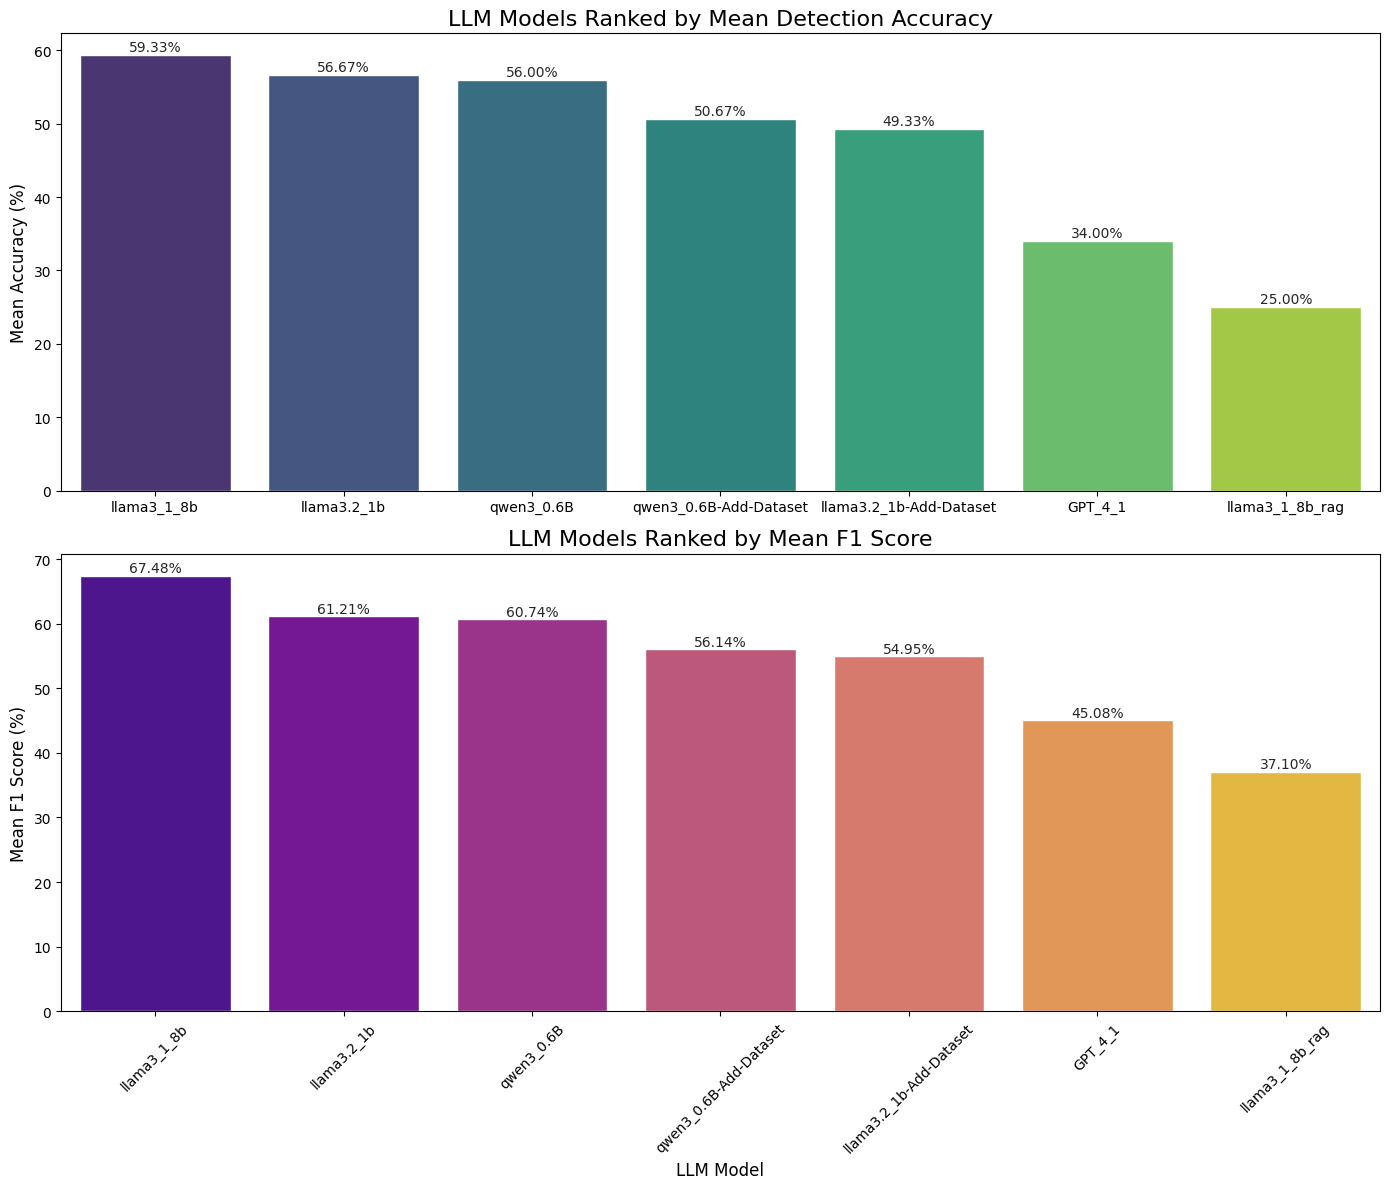

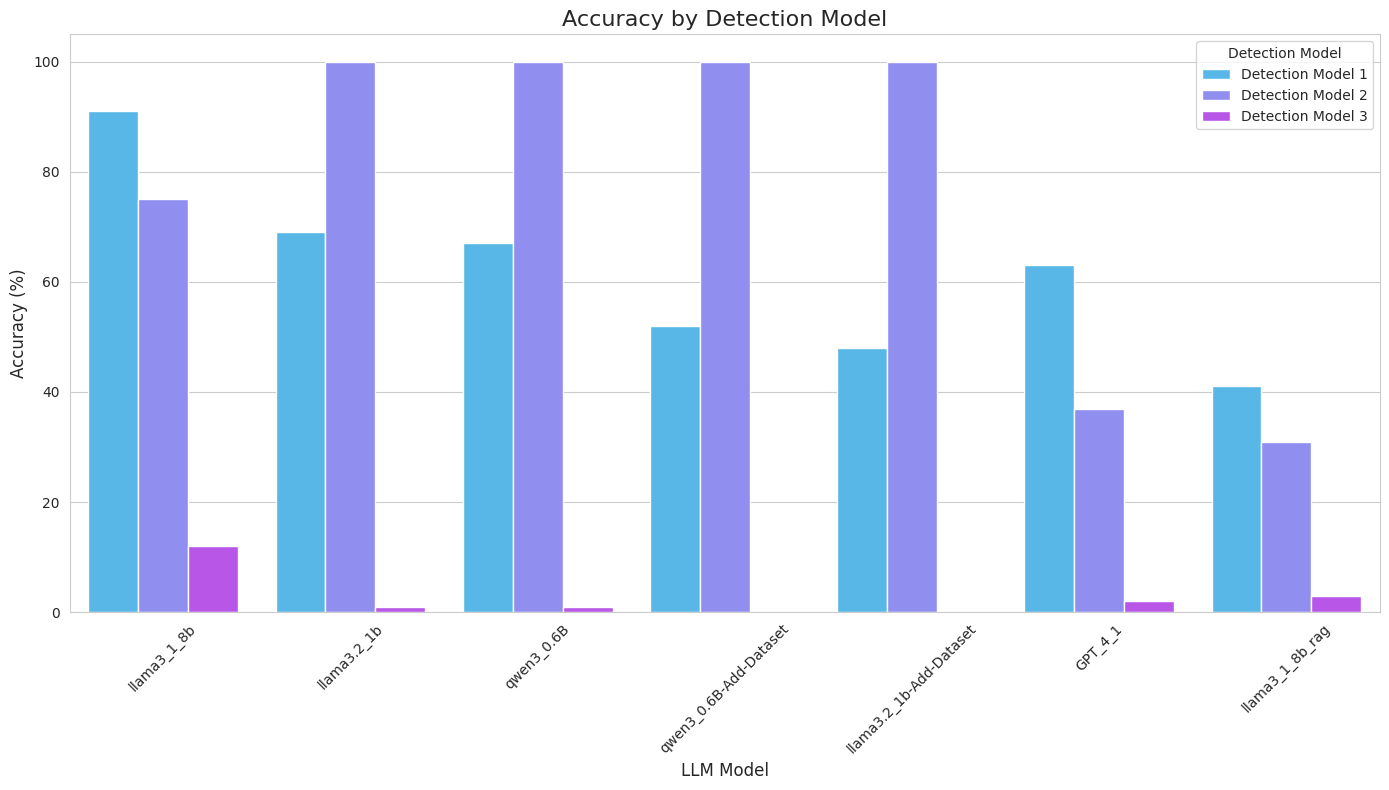

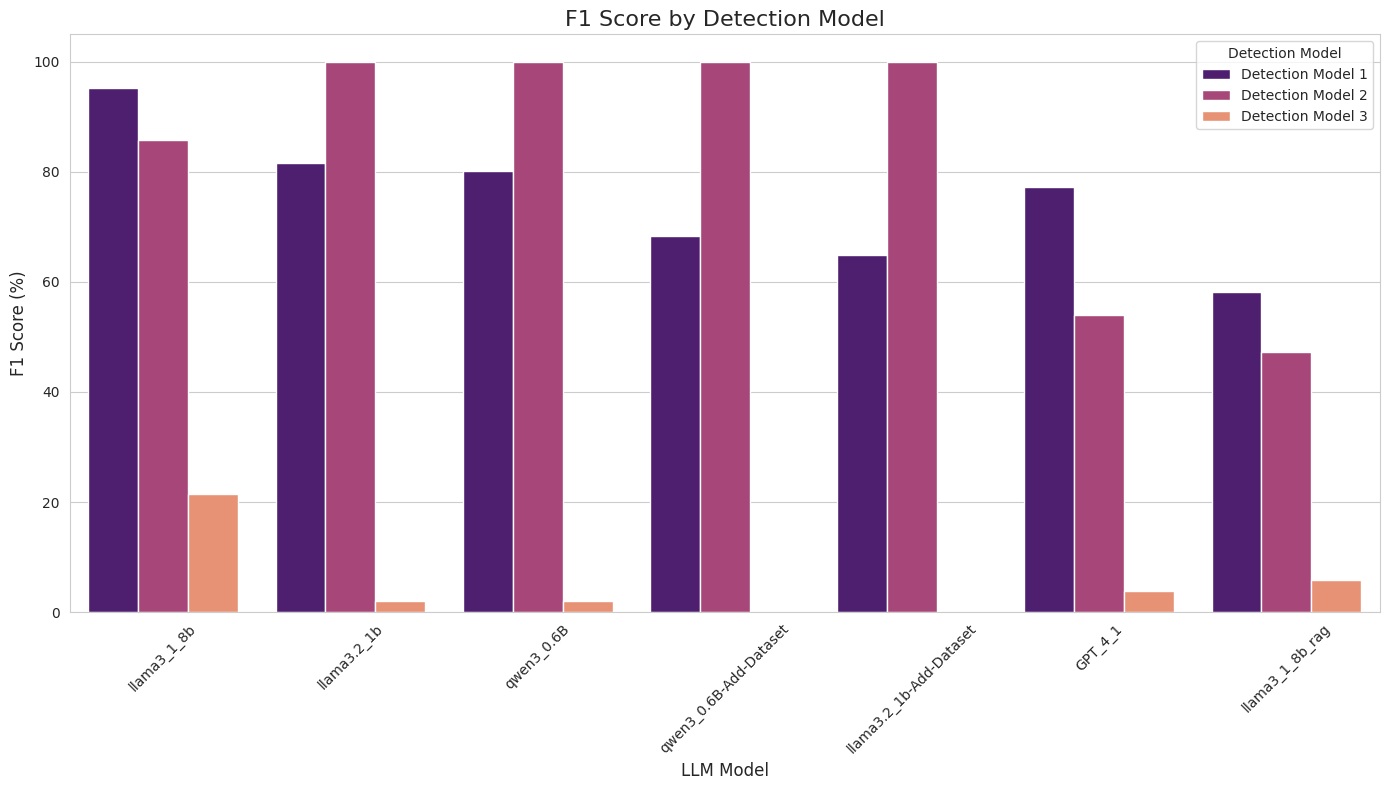

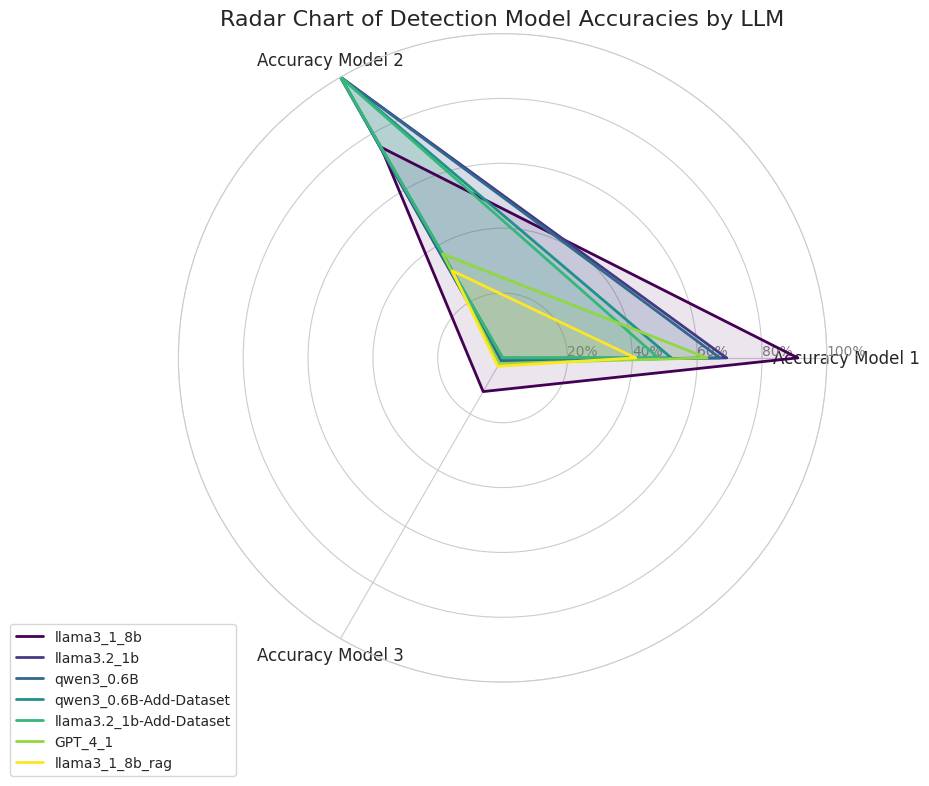

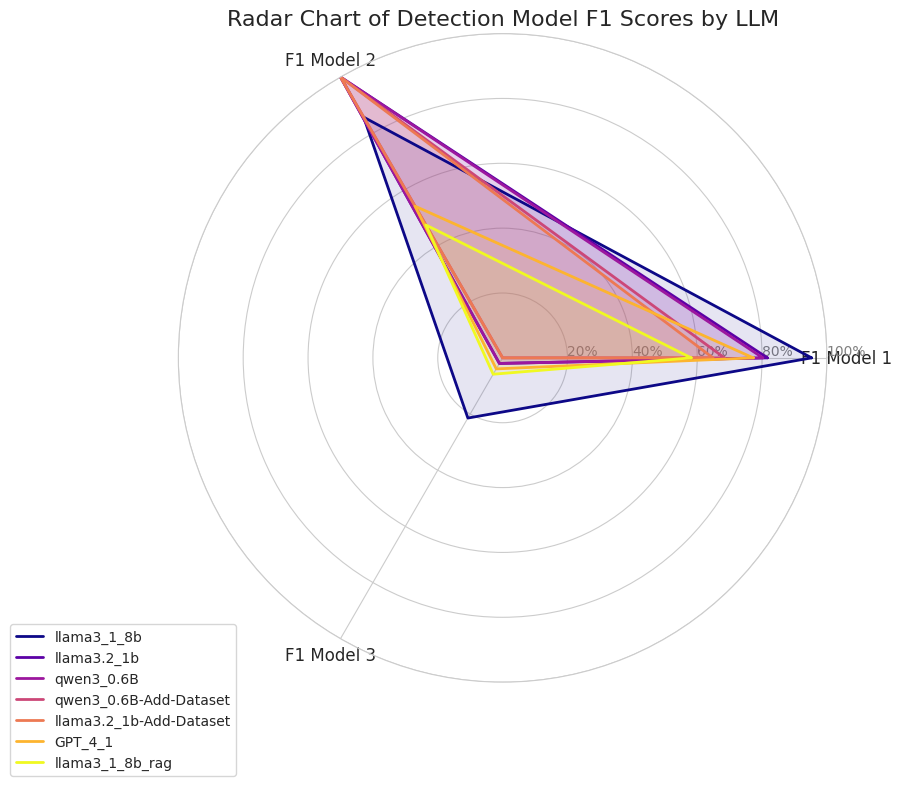


Results saved to 'llm_detection_metrics_results.csv'
Visualizations saved as PNG files


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to calculate F1 score
def calculate_f1_score(true_positives, false_positives, false_negatives):
    # Handle edge cases to avoid division by zero
    if true_positives == 0:
        return 0.0

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    if precision + recall == 0:
        return 0.0

    f1 = 2 * (precision * recall) / (precision + recall)
    return f1 * 100  # Convert to percentage

# Function to calculate metrics from a standard format file
def calculate_metrics_standard(file_path):
    df = pd.read_csv(file_path)

    results = {}
    total = len(df)

    for model_num in range(1, 4):
        pred_col = f'model{model_num}_pred'

        # Calculate confusion matrix components
        true_positives = sum((df['true_label'] == True) & (df[pred_col] == True))
        true_negatives = sum((df['true_label'] == False) & (df[pred_col] == False))
        false_positives = sum((df['true_label'] == False) & (df[pred_col] == True))
        false_negatives = sum((df['true_label'] == True) & (df[pred_col] == False))

        # Calculate accuracy and F1 score
        accuracy = ((true_positives + true_negatives) / total) * 100
        f1_score = calculate_f1_score(true_positives, false_positives, false_negatives)

        results[f'model{model_num}_accuracy'] = accuracy
        results[f'model{model_num}_f1'] = f1_score

    # Calculate mean metrics
    results['mean_accuracy'] = (results['model1_accuracy'] + results['model2_accuracy'] + results['model3_accuracy']) / 3
    results['mean_f1'] = (results['model1_f1'] + results['model2_f1'] + results['model3_f1']) / 3

    return results

# Function to calculate metrics from RAG format file
def calculate_metrics_rag(file_path):
    df = pd.read_csv(file_path)

    results = {}
    total = len(df)

    # Define column mappings for the RAG file
    model_cols = {
        1: 'model1_phish_detected',
        2: 'model2_phish-distil_v2.4.1_detected',
        3: 'model3_bert-phishing_detected'
    }

    for model_num, pred_col in model_cols.items():
        # Calculate confusion matrix components
        true_positives = sum((df['true_label'] == True) & (df[pred_col] == True))
        true_negatives = sum((df['true_label'] == False) & (df[pred_col] == False))
        false_positives = sum((df['true_label'] == False) & (df[pred_col] == True))
        false_negatives = sum((df['true_label'] == True) & (df[pred_col] == False))

        # Calculate accuracy and F1 score
        accuracy = ((true_positives + true_negatives) / total) * 100
        f1_score = calculate_f1_score(true_positives, false_positives, false_negatives)

        results[f'model{model_num}_accuracy'] = accuracy
        results[f'model{model_num}_f1'] = f1_score

    # Calculate mean metrics
    results['mean_accuracy'] = (results['model1_accuracy'] + results['model2_accuracy'] + results['model3_accuracy']) / 3
    results['mean_f1'] = (results['model1_f1'] + results['model2_f1'] + results['model3_f1']) / 3

    return results

def main():
    # List of files to analyze
    files = {
        'qwen3_0.6B': './Phishing_Email_Content_with_Personalize_Context_Data_Generation/Output/qwen3_0.6B.csv',
        'qwen3_0.6B-Add-Dataset': './Phishing_Email_Content_with_Personalize_Context_Data_Generation/Output/qwen3_0.6B-Final.csv',
        'llama3.2_1b': './Phishing_Email_Content_with_Personalize_Context_Data_Generation/Output/llama3.2_1b.csv',
        'llama3.2_1b-Add-Dataset': './Phishing_Email_Content_with_Personalize_Context_Data_Generation/Output/llama3.2_1b-Final.csv',
        'llama3_1_8b_rag': './Phishing_Email_Content_with_Personalize_Context_Data_Generation/Output/llama3_1_8b_rag.csv',
        'GPT_4_1': './Phishing_Email_Content_with_Personalize_Context_Data_Generation/Output/GPT_4_1.csv',
        'llama3_1_8b': './Phishing_Email_Content_with_Personalize_Context_Data_Generation/Output/llama3_1_8b.csv'

    }

    # Store results
    results = {}

    # Process each file
    for model_name, file_path in files.items():
        print(f"Processing {model_name}...")

        # Choose the appropriate function based on file format
        if 'rag' in model_name:
            metrics_data = calculate_metrics_rag(file_path)
        else:
            metrics_data = calculate_metrics_standard(file_path)

        results[model_name] = metrics_data
        print(f"  Mean accuracy: {metrics_data['mean_accuracy']:.2f}%")
        print(f"  Mean F1 score: {metrics_data['mean_f1']:.2f}%")

    # Extract data for visualization
    models = list(results.keys())
    mean_accuracies = [results[model]['mean_accuracy'] for model in models]
    mean_f1_scores = [results[model]['mean_f1'] for model in models]
    model1_accuracies = [results[model]['model1_accuracy'] for model in models]
    model2_accuracies = [results[model]['model2_accuracy'] for model in models]
    model3_accuracies = [results[model]['model3_accuracy'] for model in models]
    model1_f1s = [results[model]['model1_f1'] for model in models]
    model2_f1s = [results[model]['model2_f1'] for model in models]
    model3_f1s = [results[model]['model3_f1'] for model in models]

    # Sort by mean accuracy
    sorted_indices = np.argsort(mean_accuracies)[::-1]  # Sort in descending order
    sorted_models = [models[i] for i in sorted_indices]
    sorted_mean_accuracies = [mean_accuracies[i] for i in sorted_indices]
    sorted_mean_f1_scores = [mean_f1_scores[i] for i in sorted_indices]
    sorted_model1_accuracies = [model1_accuracies[i] for i in sorted_indices]
    sorted_model2_accuracies = [model2_accuracies[i] for i in sorted_indices]
    sorted_model3_accuracies = [model3_accuracies[i] for i in sorted_indices]
    sorted_model1_f1s = [model1_f1s[i] for i in sorted_indices]
    sorted_model2_f1s = [model2_f1s[i] for i in sorted_indices]
    sorted_model3_f1s = [model3_f1s[i] for i in sorted_indices]

    # Create a DataFrame for visualization
    df_results = pd.DataFrame({
        'Model': sorted_models,
        'Mean Accuracy': sorted_mean_accuracies,
        'Mean F1 Score': sorted_mean_f1_scores,
        'Acc_Model_1': sorted_model1_accuracies,
        'Acc_Model_2': sorted_model2_accuracies,
        'Acc_Model_3': sorted_model3_accuracies,
        'F1_Model_1': sorted_model1_f1s,
        'F1_Model_2': sorted_model2_f1s,
        'F1_Model_3': sorted_model3_f1s
    })

    print("\nRanked models by mean accuracy:")
    for i, (model, acc, f1) in enumerate(zip(sorted_models, sorted_mean_accuracies, sorted_mean_f1_scores)):
        print(f"{i+1}. {model}: Accuracy={acc:.2f}%, F1={f1:.2f}%")

    # Visualize the results - Accuracy and F1 Score Comparison
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

    # Plot accuracy
    sns.set_style("whitegrid")
    sns.barplot(x='Model', y='Mean Accuracy', data=df_results, palette='viridis', ax=ax1)
    ax1.set_title('LLM Models Ranked by Mean Detection Accuracy', fontsize=16)
    ax1.set_ylabel('Mean Accuracy (%)', fontsize=12)
    ax1.set_xlabel('')
    plt.xticks(rotation=45)

    # Add value labels on top of the bars
    for i, v in enumerate(sorted_mean_accuracies):
        ax1.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

    # Plot F1 scores
    sns.barplot(x='Model', y='Mean F1 Score', data=df_results, palette='plasma', ax=ax2)
    ax2.set_title('LLM Models Ranked by Mean F1 Score', fontsize=16)
    ax2.set_ylabel('Mean F1 Score (%)', fontsize=12)
    ax2.set_xlabel('LLM Model', fontsize=12)
    plt.xticks(rotation=45)

    # Add value labels on top of the bars
    for i, v in enumerate(sorted_mean_f1_scores):
        ax2.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

    plt.tight_layout()
    plt.savefig('llm_detection_metrics_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Grouped bar chart for accuracy across detection models
    plt.figure(figsize=(14, 8))

    # Melt the DataFrame for seaborn
    acc_cols = ['Acc_Model_1', 'Acc_Model_2', 'Acc_Model_3']
    df_acc_melted = pd.melt(df_results, id_vars=['Model'],
                        value_vars=acc_cols,
                        var_name='Detection Model', value_name='Accuracy')

    # Rename the detection model names for better labeling
    df_acc_melted['Detection Model'] = df_acc_melted['Detection Model'].map({
        'Acc_Model_1': 'Detection Model 1',
        'Acc_Model_2': 'Detection Model 2',
        'Acc_Model_3': 'Detection Model 3'
    })

    # Plot
    sns.barplot(x='Model', y='Accuracy', hue='Detection Model', data=df_acc_melted, palette='cool')
    plt.title('Accuracy by Detection Model', fontsize=16)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.xlabel('LLM Model', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Detection Model')

    plt.tight_layout()
    plt.savefig('llm_detection_accuracy_by_model.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Grouped bar chart for F1 scores across detection models
    plt.figure(figsize=(14, 8))

    # Melt the DataFrame for seaborn
    f1_cols = ['F1_Model_1', 'F1_Model_2', 'F1_Model_3']
    df_f1_melted = pd.melt(df_results, id_vars=['Model'],
                        value_vars=f1_cols,
                        var_name='Detection Model', value_name='F1 Score')

    # Rename the detection model names for better labeling
    df_f1_melted['Detection Model'] = df_f1_melted['Detection Model'].map({
        'F1_Model_1': 'Detection Model 1',
        'F1_Model_2': 'Detection Model 2',
        'F1_Model_3': 'Detection Model 3'
    })

    # Plot
    sns.barplot(x='Model', y='F1 Score', hue='Detection Model', data=df_f1_melted, palette='magma')
    plt.title('F1 Score by Detection Model', fontsize=16)
    plt.ylabel('F1 Score (%)', fontsize=12)
    plt.xlabel('LLM Model', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Detection Model')

    plt.tight_layout()
    plt.savefig('llm_detection_f1_by_model.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Create radar charts
    # First for accuracy
    plt.figure(figsize=(10, 8))

    # Create radar chart for accuracy
    categories = ['Accuracy Model 1', 'Accuracy Model 2', 'Accuracy Model 3']
    N = len(categories)

    # Create angles for each category
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    # Initialize the radar chart
    ax = plt.subplot(111, polar=True)

    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories, size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20, 40, 60, 80, 100], ["20%", "40%", "60%", "80%", "100%"], color="grey", size=10)
    plt.ylim(0, 100)

    # Plot each model
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_models)))
    for i, model in enumerate(sorted_models):
        values = [sorted_model1_accuracies[i], sorted_model2_accuracies[i], sorted_model3_accuracies[i]]
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[i])
        ax.fill(angles, values, alpha=0.1, color=colors[i])

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Radar Chart of Detection Model Accuracies by LLM', size=16)

    plt.tight_layout()
    plt.savefig('llm_detection_accuracy_radar.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Then for F1 scores
    plt.figure(figsize=(10, 8))

    # Create radar chart for F1 scores
    categories = ['F1 Model 1', 'F1 Model 2', 'F1 Model 3']

    # Initialize the radar chart
    ax = plt.subplot(111, polar=True)

    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories, size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20, 40, 60, 80, 100], ["20%", "40%", "60%", "80%", "100%"], color="grey", size=10)
    plt.ylim(0, 100)

    # Plot each model
    colors = plt.cm.plasma(np.linspace(0, 1, len(sorted_models)))
    for i, model in enumerate(sorted_models):
        values = [sorted_model1_f1s[i], sorted_model2_f1s[i], sorted_model3_f1s[i]]
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[i])
        ax.fill(angles, values, alpha=0.1, color=colors[i])

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Radar Chart of Detection Model F1 Scores by LLM', size=16)

    plt.tight_layout()
    plt.savefig('llm_detection_f1_radar.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Save results to CSV
    df_results.to_csv('llm_detection_metrics_results.csv', index=False)
    print("\nResults saved to 'llm_detection_metrics_results.csv'")
    print("Visualizations saved as PNG files")

if __name__ == "__main__":
    main()